# Analisis Exploratorio de datos 

Al tener como objetivo evaluar cómo las características técnicas de las canciones (ej. energía, bailabilidad, acústica) se correlacionan con la popularidad en Spotify, para identificar patrones que puedan optimizar las estrategias de producción musical para disqueras y artistas.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
sns.set_palette("pastel")

In [7]:
df = pd.read_csv('dataset.csv') 
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [9]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


El dataset tiene 114,000 canciones con 21 variables y métricas de popularidad. Como pequeños hhallazgos notables en este descriptivo es que la popularidad tiene un sesgo hacia valores bajos, con una media de 33.24/100 (±22.31) y mediana de 35.
Con este descriptivo vamos a llevar a cabo los pasos para identificar la características de las canciones exitosas dependiendo de la variable Popularidad y con estos resultados dar las recomendaciones específicas.

Al encontrar una alerta de posibles nulos y duplicados, hacemos un tratamiento más detallado de ellos.

In [10]:
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminamos columna innecesaria si existe
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Verificamos duplicados
print("\nNúmero de duplicados:", df.duplicated().sum())

# Eliminar duplicados si los hay
df = df.drop_duplicates()

# Verificar valores únicos en las columnas categóricas
print("\nValores únicos en track_genre:", df['track_genre'].nunique())
print(df['track_genre'].value_counts().head(10))


Valores nulos por columna:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Número de duplicados: 450

Valores únicos en track_genre: 114
track_genre
acoustic       1000
emo            1000
rock-n-roll    1000
reggaeton      1000
disco          1000
r-n-b          1000
punk-rock      1000
pagode         1000
electronic     1000
mpb            1000
Name: count, dtype: int64


Encontramos en la base 3 nulos que debemos tratar para así observar mejor los datos.

In [11]:
for col in ['artists', 'album_name', 'track_name']:
    df[col] = df[col].fillna(f"Missing_{col}")
    print(df.isnull().sum()) 

track_id            0
artists             0
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
track_id            0
artists             0
album_name          0
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
track_id            0
artists             0
album_name          0
track_name          0
popula

Ahora un analisis de Outliers

C:\Users\Administrador\AppData\Local\Temp\ipykernel_31364\1949587541.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Administrador\AppData\Local\Temp\ipykernel_31364\1949587541.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Administrador\AppData\Local\Temp\ipykernel_31364\1949587541.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Administrador\AppData\Local\Temp\ipykernel_31364\1949587541.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Administrador\AppData\Local\Temp\ipykernel_31364\1949587541.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Administrador\AppData\Local\Temp\ipykernel_31364\1949587541.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Administrador\AppData\Local\Temp\ipykernel_31364\1949587541.py:11: UserWarning: The figure layout

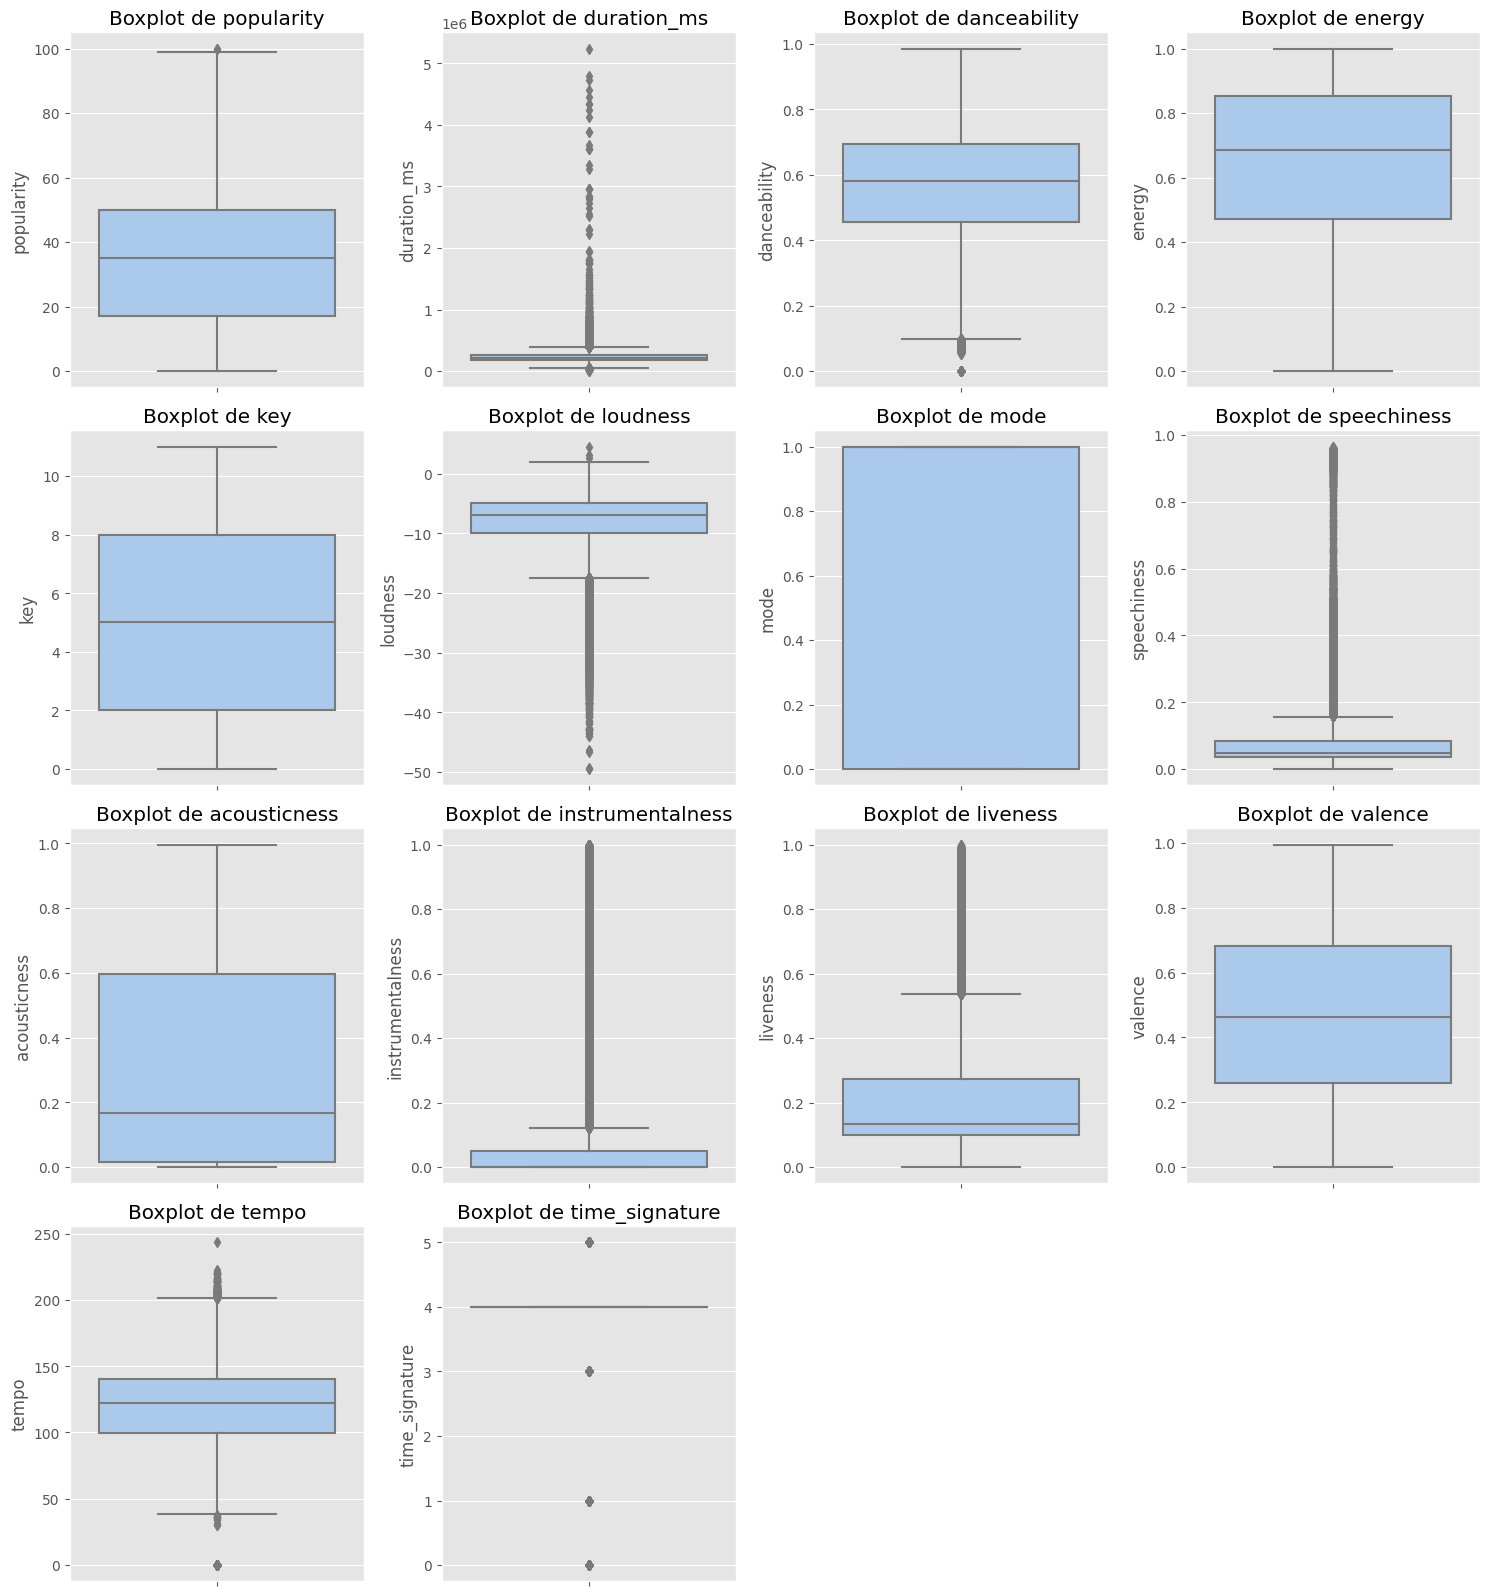

In [12]:
# Librerias necesarias
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
def plot_outliers(df, columns):
    plt.figure(figsize=(15, 20))
    for i, col in enumerate(columns):
        plt.subplot(5, 4, i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot de {col}')
        plt.tight_layout()
    plt.show()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_outliers(df, numeric_cols)

Haciendo un analisis de cada una de las variables viendo los boxplots de Outliers es, primero, duration_ms (en milisegundos) es que hay canciones que duran más que 5,000,000 ms, siendo aproximadamente unos 83 minutos, algo excepcional. Por lo que pueden haber posibles errores de datos o canciones conceptuales.

En la instrumentalidad las canciones con más popularidad no son 100% instrumentales porque la mayoría, siendo el 75%, está por debajo de aproximadamente 0.049.

En el compás (time_signature), casi el 100% está en 4/4, lo que significa que todas las canciones de la mayoriía de géneros comparten un mismo compás pues influye en que todas empiencen igual. Se haría un estudio de la historia de esta variable desde tiempos antiguos pues no tiene un cambio en las canciones sin importar su género.

In [16]:
# Normalidad Kolmogrov
from scipy.stats import kstest

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
results = []

for col in numeric_cols:
    data = df[col].dropna()  # Eliminar NA
    if len(data) > 0:  
        mean, std = data.mean(), data.std()
        ks_stat, p_value = kstest(data, 'norm', args=(mean, std))
        
        results.append({
            'Variable': col,
            'N muestras': len(data),
            'KS Statistic': ks_stat,
            'p-value': p_value,
            'Normal (α=0.05)': p_value > 0.05
        })
results_df = pd.DataFrame(results)
print("\n=== Resultados KS (Datos Originales, sin Imputación) ===")
print(results_df.to_string(index=False))
non_normal_vars = results_df[results_df['Normal (α=0.05)'] == False]['Variable'].tolist()
print("\nVariables NO normales (p < 0.05):", non_normal_vars)



=== Resultados KS (Datos Originales, sin Imputación) ===
        Variable  N muestras  KS Statistic       p-value  Normal (α=0.05)
      popularity      113550      0.087285  0.000000e+00            False
     duration_ms      113550      0.126856  0.000000e+00            False
    danceability      113550      0.032712 5.333600e-106            False
          energy      113550      0.077317  0.000000e+00            False
             key      113550      0.134937  0.000000e+00            False
        loudness      113550      0.125070  0.000000e+00            False
            mode      113550      0.412280  0.000000e+00            False
     speechiness      113550      0.280316  0.000000e+00            False
    acousticness      113550      0.172907  0.000000e+00            False
instrumentalness      113550      0.394205  0.000000e+00            False
        liveness      113550      0.200507  0.000000e+00            False
         valence      113550      0.047247 1.021882e-2

Al darnos cuenta que no son normales, se hizo una imputación de los datos con la media como medida para evaluar simetría de ciertos datos. Pero fuera de este EDA se hizo tal evaluación y no dieron normales, por lo cual no dio indicios de problemas con los Outliers, por lo que preferimos la imputación con la mediana pues la media distorsiona esos dattos atípicos. Esto dió lo siguiente:

In [17]:
from tqdm import tqdm
from scipy.stats import kstest
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

results = []
for genre in tqdm(df['track_genre'].unique(), desc="Analizando géneros"):
    genre_data = df[df['track_genre'] == genre]
    
    
    if len(genre_data) >= 3:
        for col in numeric_cols:
            col_data = genre_data[col].dropna()  
            
            
            if len(col_data) >= 3:
                mu, sigma = col_data.mean(), col_data.std()
                
                
                D_stat, p_value = kstest(col_data, 'norm', args=(mu, sigma))
                
                results.append({
                    'track_genre': genre,
                    'variable': col,
                    'p_value': p_value,
                    'normalidad': 'Normal' if p_value > 0.05 else 'No Normal'
                })

normality_df = pd.DataFrame(results)

generos_normales = normality_df[normality_df['normalidad'] == 'Normal']

print("\n=== Resultados de Normalidad por Género y Variable ===")
print(generos_normales.to_string(index=False))


Analizando géneros: 100%|██████████| 114/114 [00:03<00:00, 37.17it/s]


=== Resultados de Normalidad por Género y Variable ===
      track_genre     variable  p_value normalidad
         acoustic danceability 0.099449     Normal
         alt-rock danceability 0.068151     Normal
      alternative danceability 0.099301     Normal
            anime  duration_ms 0.178434     Normal
            anime danceability 0.545063     Normal
      black-metal        tempo 0.113268     Normal
        bluegrass danceability 0.090222     Normal
        bluegrass        tempo 0.128300     Normal
           brazil danceability 0.077008     Normal
           brazil       energy 0.277252     Normal
        breakbeat danceability 0.070099     Normal
          british        tempo 0.057247     Normal
         cantopop danceability 0.102343     Normal
            chill danceability 0.071581     Normal
            chill       energy 0.075906     Normal
        classical danceability 0.198810     Normal
        classical     loudness 0.205861     Normal
             club danceabi

Los resultados arrojados nos muestran que hay normalidad en casi todos los géneros.

Los siguiente fue hacer los graficos de distribución de las variables para visualizar sus comportamientos:

c:\Users\Administrador\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrador\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrador\AppData\Local\Temp\ipykernel_31364\3588578557.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\Administrador\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

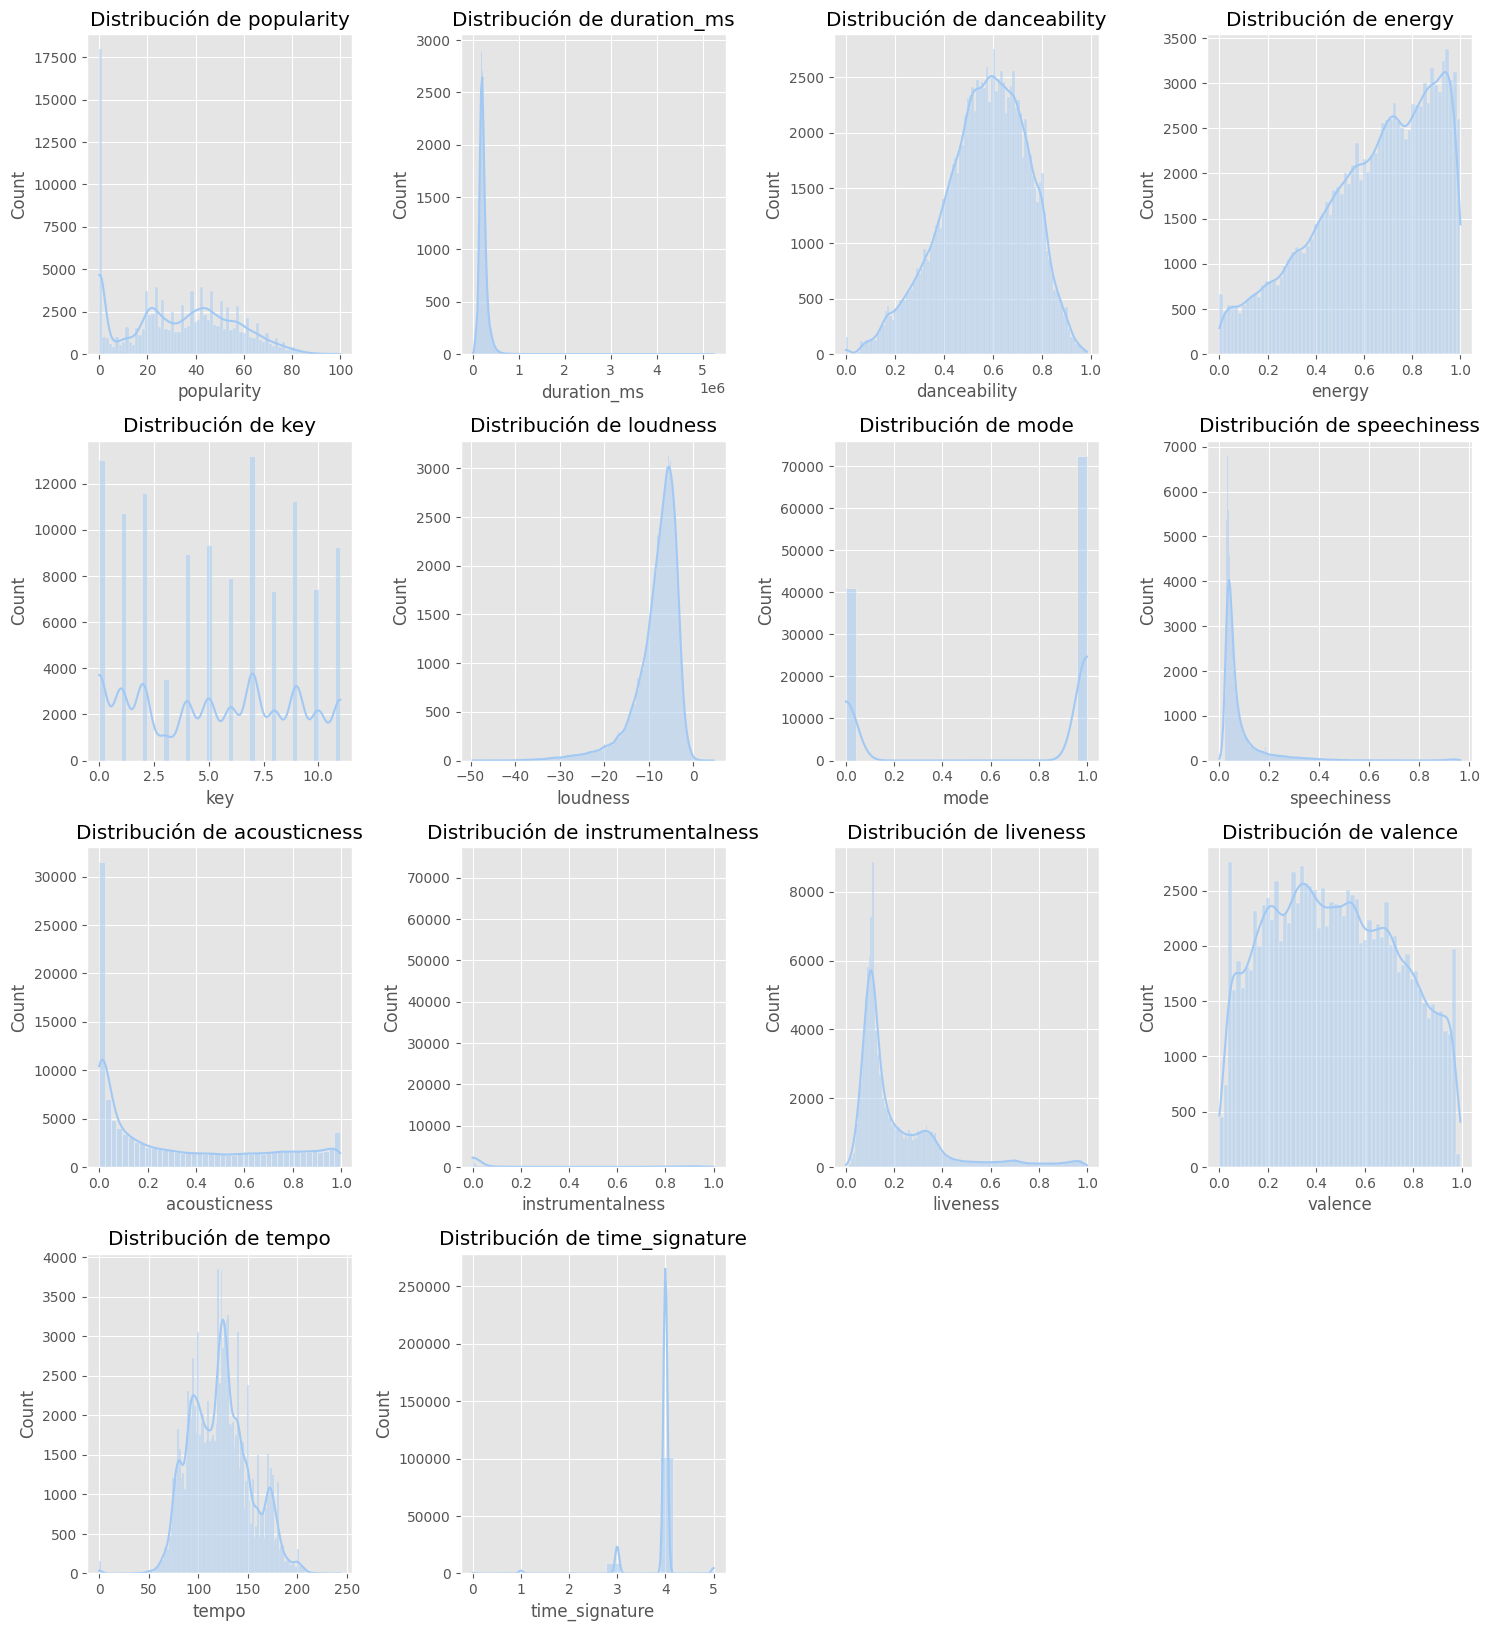

In [14]:
# Distribución de todas las variables
def plot_distributions(df, columns):
    plt.figure(figsize=(15, 20))
    for i, col in enumerate(columns):
        plt.subplot(5, 4, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribución de {col}')
        plt.tight_layout()
    plt.show()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_distributions(df, numeric_cols)

Por lo visto en las gráficas podemos visualizar que para la Popularidad Popularity solo unn pequeña subida, es decir, pocas canciones alcanzan alta popularidad.

En cuanto a la Duración de las canciones la mayoría dura entre 2-4 minutos.

Para la variable Key no se ve una preferencia por alguna tonalidad en general.

En Loudness podemos inferir que las canciones más escuchadas y que alcanzan un pico alto están entre -6 a -4 dB

Las canciones más bailables tienen un ritmo por encima de (aprox.) 0.45 y y son más comunes la que tienen una alta energía (mayor a 0.7), como las playlist de ejercicio para los centros educativos o GYMs.

En cuanto a la acustica se ve un pico en 0 y entre 0.8 a 1, lo cual significa que el sonido debe ser puro. Y en las Instrumentales no hay un pico significativo desde los 0.5, por lo cual son pocas canciones que lo tienen. 

En la variable Tempo la mayoría de las canciones tienen un número de pulsaciones o latidos entre los 100BPM A 140 BPM. Y en Time Signature las cancioness más escuchadas tienen un compás de 4/4.

Como nuestra variable predictora es la Popularidad de las canciones, atribuimos a fondo su invetigación y repercusión en el estudio de nuestro Analisis Exploratorio. Por ello vemos de cerca su distribución.

c:\Users\Administrador\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


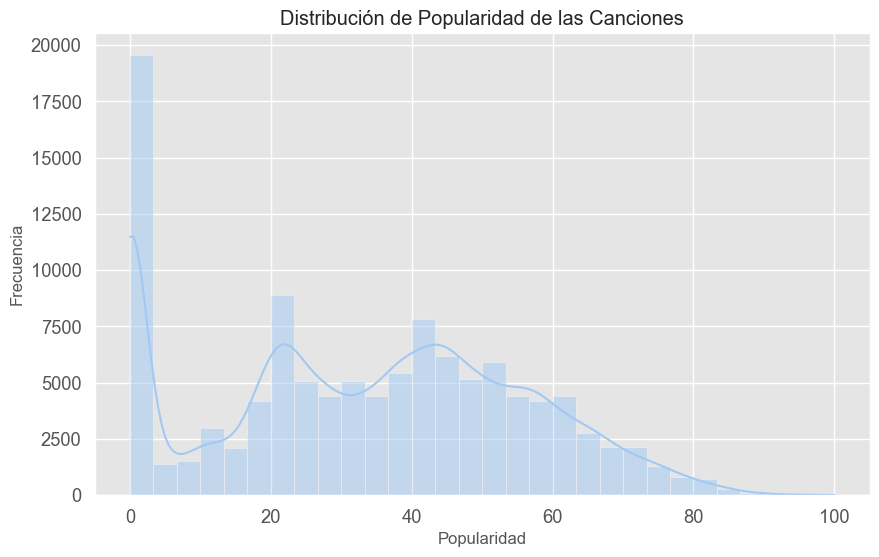


Estadísticas de popularidad:
count    113550.000000
mean         33.324139
std          22.283976
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64


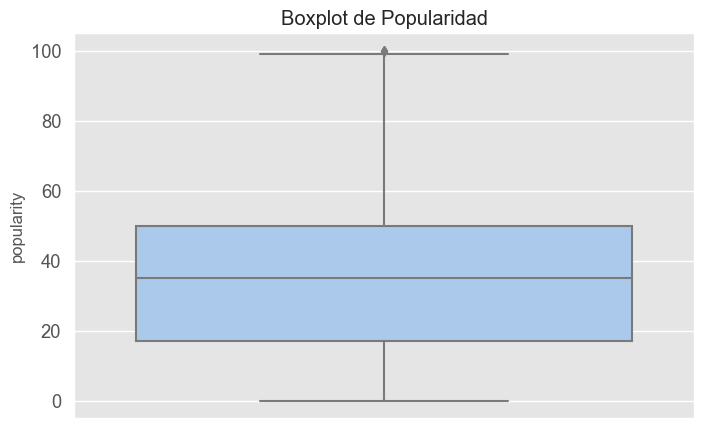

In [ ]:
# Análisis de la distribución de Popularidad
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribución de Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas de popularity
print("\nEstadísticas de popularidad:")
print(df['popularity'].describe())

# Boxplot de popularity
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['popularity'])
plt.title('Boxplot de Popularidad')
plt.show()

De acuerdo con el gráfico de distribución podemos notar que la mayoría de las canciones tienen popularidad menos que 60, después decae, por lo cual son muy pocas las canciones que llegan a tener una alta popularidad, y por su descriptivo se confirma una asimetría con cola a la derecha, es decir, muchos atípicos mayores a 50 y son los que más rapido llegan a un "éxito musical".

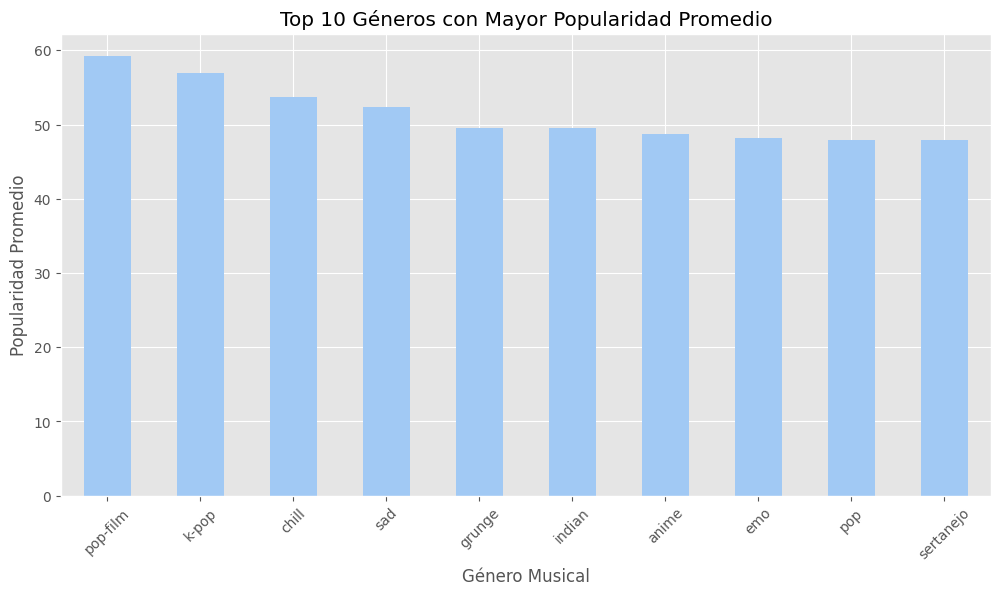

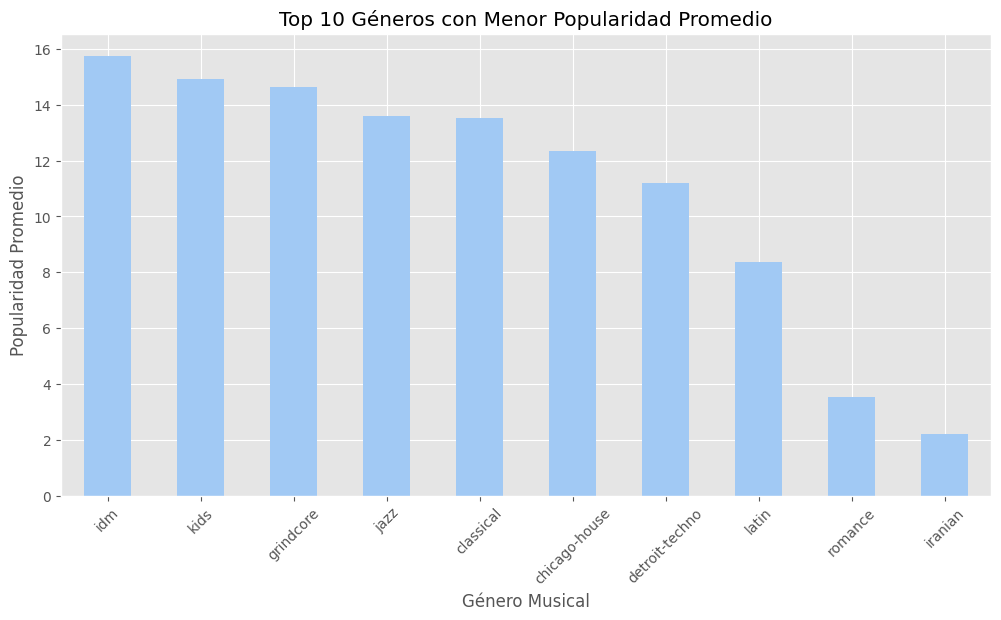

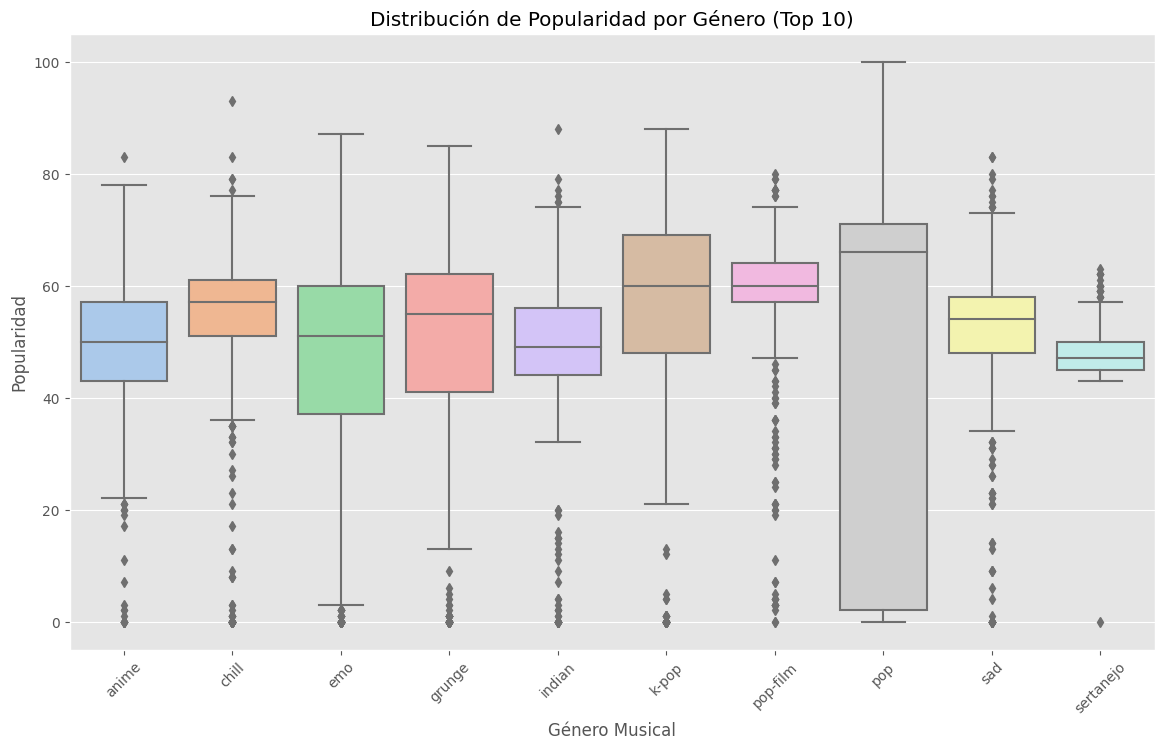

In [15]:
import matplotlib.pyplot as plt
popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
popularity_by_genre.head(10).plot(kind='bar')
plt.title('Top 10 Géneros con Mayor Popularidad Promedio')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
popularity_by_genre.tail(10).plot(kind='bar')
plt.title('Top 10 Géneros con Menor Popularidad Promedio')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45)
plt.show()

# Boxplot para los principales géneros
top_genres = popularity_by_genre.head(10).index
df_top_genres = df[df['track_genre'].isin(top_genres)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='track_genre', y='popularity', data=df_top_genres)
plt.title('Distribución de Popularidad por Género (Top 10)')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.show()

Analizando el Top de los 10 géneros con mayor popularidad vemos preferencias en estos géneros: 
- Pop 

- K-pop 

- Pop-film 

- Dance-pop 

Por lo cual para las disqueras se les recomienda invertir más en estos géneros

Mientras que en el Tp de los 10 géneros con menor popularidad como el Grimbton, Kids, Classical e Iranian tiene un bajo rendimiento en Spotify, por lo cual se les recomienda usar otras app que los impulsen.

Y en la Distribución de popularidad por género el K-pop muestra alta popularidad y algunos temas en géneros menos populares como señanajo logran alta popularidad.

Matriz de correlación: (14, 14)


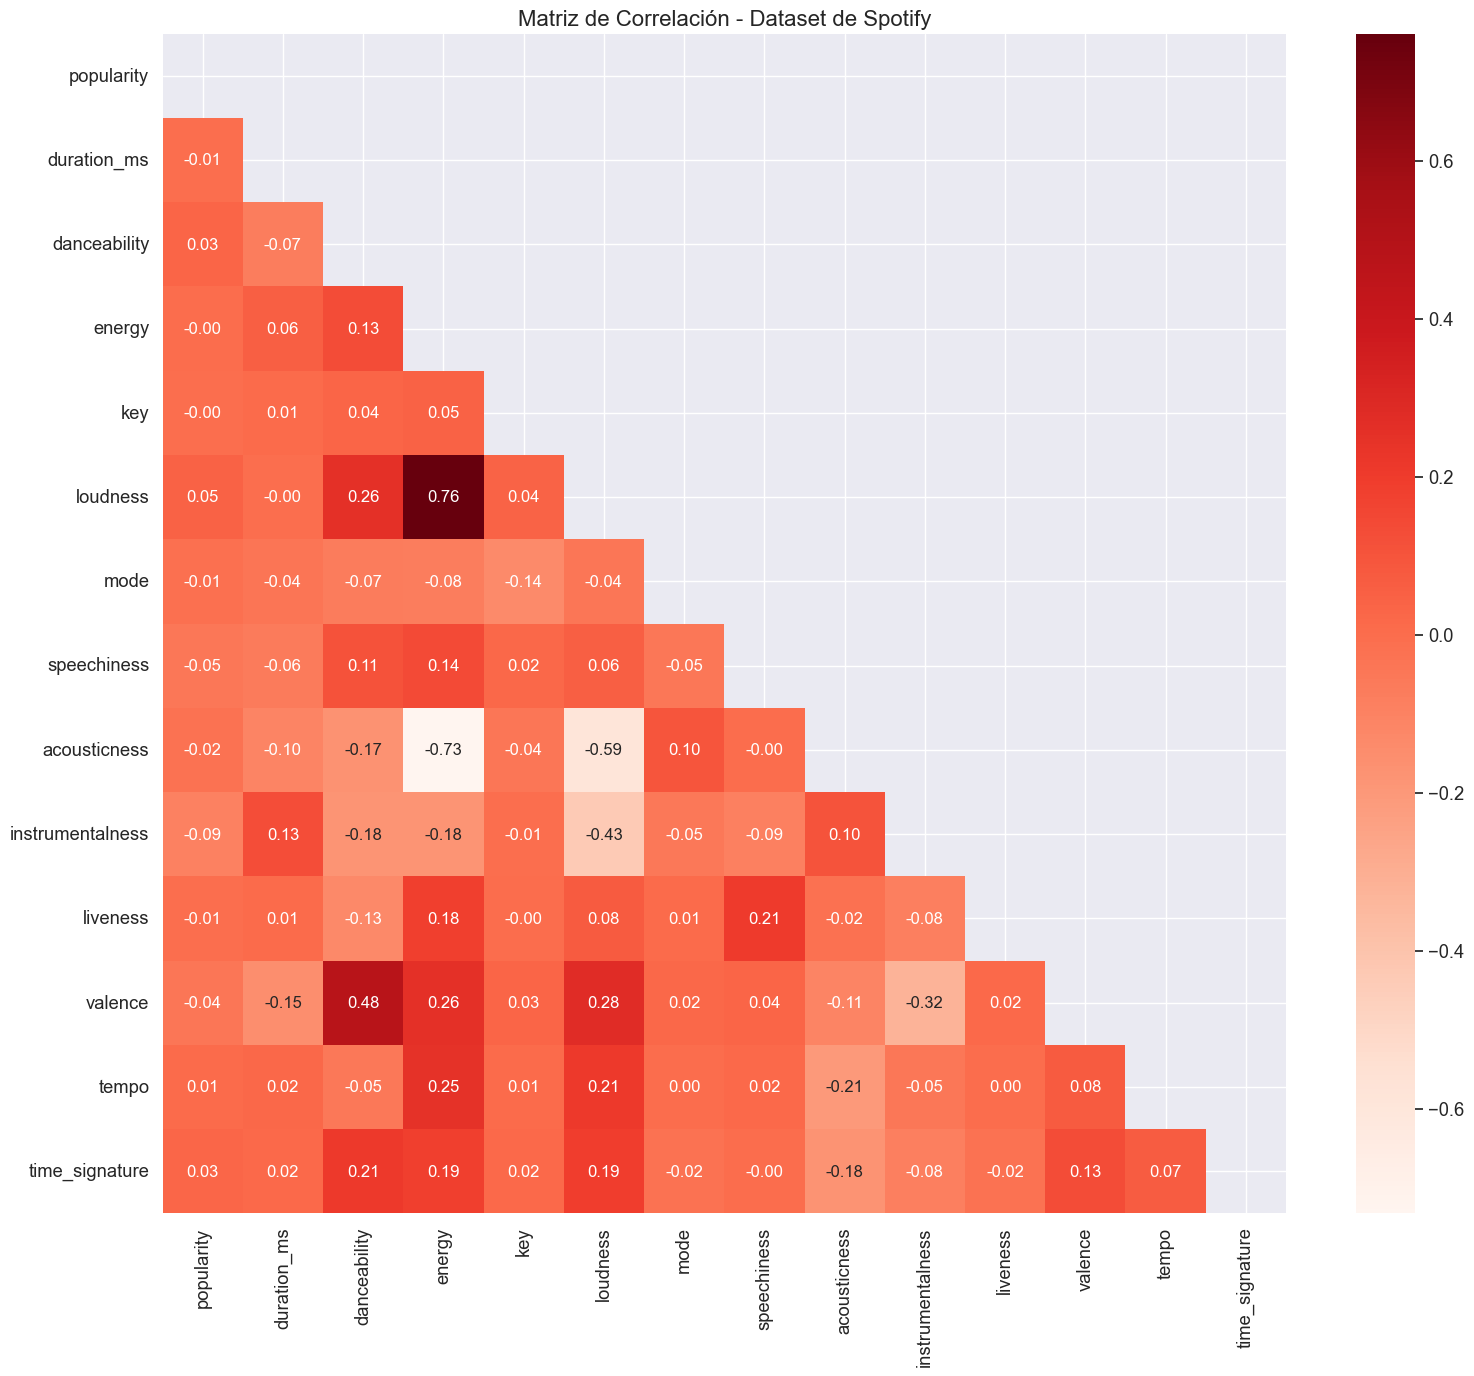

In [19]:
# Calcular la matriz de correlación
spotify_num = df.select_dtypes(include=np.number)

corr = spotify_num.corr()
print("Matriz de correlación:", corr.shape)

# Crear la máscara para ocultar la mitad superior
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Configurar el estilo y mostrar el mapa de calor
sns.set(font_scale=1.2)
plt.figure(figsize=(16, 14))
sns.heatmap(corr, mask=mask, cmap='Reds', annot=True, fmt='.2f', annot_kws={"size": 12}, cbar=True)
plt.title("Matriz de Correlación - Dataset de Spotify", fontsize=16)
plt.tight_layout()
plt.show()

Aquí podemos ver las correlacione más significativas entre variables como la Energía y Volumen pues muchas canciones energéticas tienden a tener un alto volumen.

Tambien entre la Acustica y la Energía con Volumen pues al ser más "movidas" contienen una acustica más alta.

Mientras que en estado medio la popularidad, siendo nuestra variable predictora, tiene correlaciones medias con las anteriormente mencionadas pues las anciones populares tienden a ser más altas en volumen pero algunas con acústicas son menos populares.

Y las correlaciones más bajas, siendo entre variables como Key, Time_signature y Tempo no influye en la popularidad.

Al evaluar estso comportamientos, hicimos un análisis PCA para ver más detalladamente la variabilidad de estas variables:

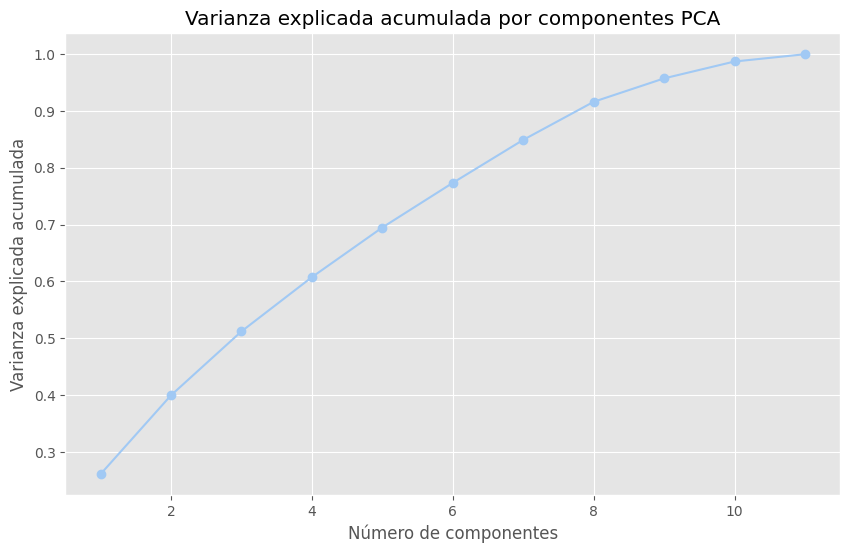

In [20]:
# Análisis PCA
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(['key', 'mode', 'time_signature'], axis=1)
numeric_df = numeric_df.fillna(numeric_df.mean())

# Estandarización
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
pca = PCA()
pca_result = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza explicada acumulada por componentes PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

Viendo este patrón junto con los datos musicales se caracteriza que:

- PC1: correlacionado con Energy y Volumen.

- PC2: Podría representar estilo acústico vs. electrónico.

- PC3: Relación entre bailabilidad y positividad (valence).

Por lo cual, muchas características musicales como la energía, bailabilidad, etc., están correlacionadas, lo cual se ajusta a lo que visualizamos en el gráfico de correlaciones. 

In [5]:
# Analisis VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
spotify_num = df.select_dtypes(include=np.number)

# Eliminar columnas que no tienen suficiente varianza (opcional)
spotify_num = spotify_num.dropna(axis=1)  # Por si hay columnas con NaN

# Escalar los datos antes de calcular VIF
scaler = StandardScaler()
spotify_scaled = scaler.fit_transform(spotify_num)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = spotify_num.columns
vif_data["VIF"] = [variance_inflation_factor(spotify_scaled, i) for i in range(spotify_scaled.shape[1])]

# Mostrar el resultado
print(vif_data.sort_values(by="VIF", ascending=False))

            Variable       VIF
4             energy  4.268640
6           loudness  3.286287
9       acousticness  2.421847
12           valence  1.588647
3       danceability  1.542280
10  instrumentalness  1.482233
11          liveness  1.145427
8        speechiness  1.143808
13             tempo  1.091738
14    time_signature  1.081034
2        duration_ms  1.055172
7               mode  1.041858
0         Unnamed: 0  1.027134
1         popularity  1.024455
5                key  1.021436


Podemos notar que todas las variables tienen un valor VIF entre 1 a 5, lo que indica que no hay problemas graves de multicolinealidad.

Con esto en mente, hicimos una analisis de correlación más a fondo de nuestra variable predictora (Popularidad):

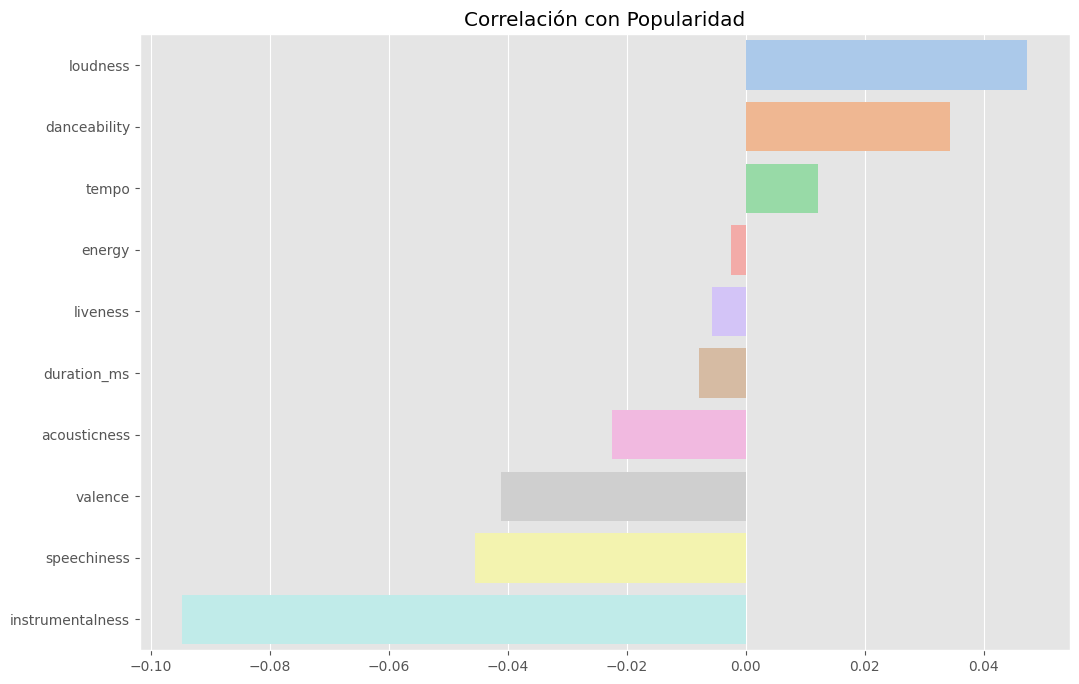

In [21]:
# Correlaciones con popularidad
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()['popularity'].sort_values(ascending=False)[1:]
sns.barplot(y=corr.index, x=corr.values)
plt.title('Correlación con Popularidad')
plt.show()

Visto en el gráfico, podemos ver una mayor correlación con nuestra variabloe predictora con las siguientes variables Estas características están asociadas a mayor popularidad en canciones:

- Volumen
- Bailabilidad
- Energía 

Es decir, canciones que contengas un mayor volumen y que contengan ritmos bailables producen una mayor energía y, asimismo, una mayor popularidad para el público en general.

Para las variables tempo, vivacidad y duración influyen poco en que las canciones tengan una popularidad alta, pero son vitales para que se mantengan en los tops. 

Y por último, en variables como la acustica y la instrumentalidad no influyen significativamente en la popularidad de una canción, por lo cual no es recomendable que se hagan mayormente canciones puramente instrumentales pues son poco atractivas.

Teniendo estas características presente, decidimos indagar más en la influencia de los artistas a estas cifras:

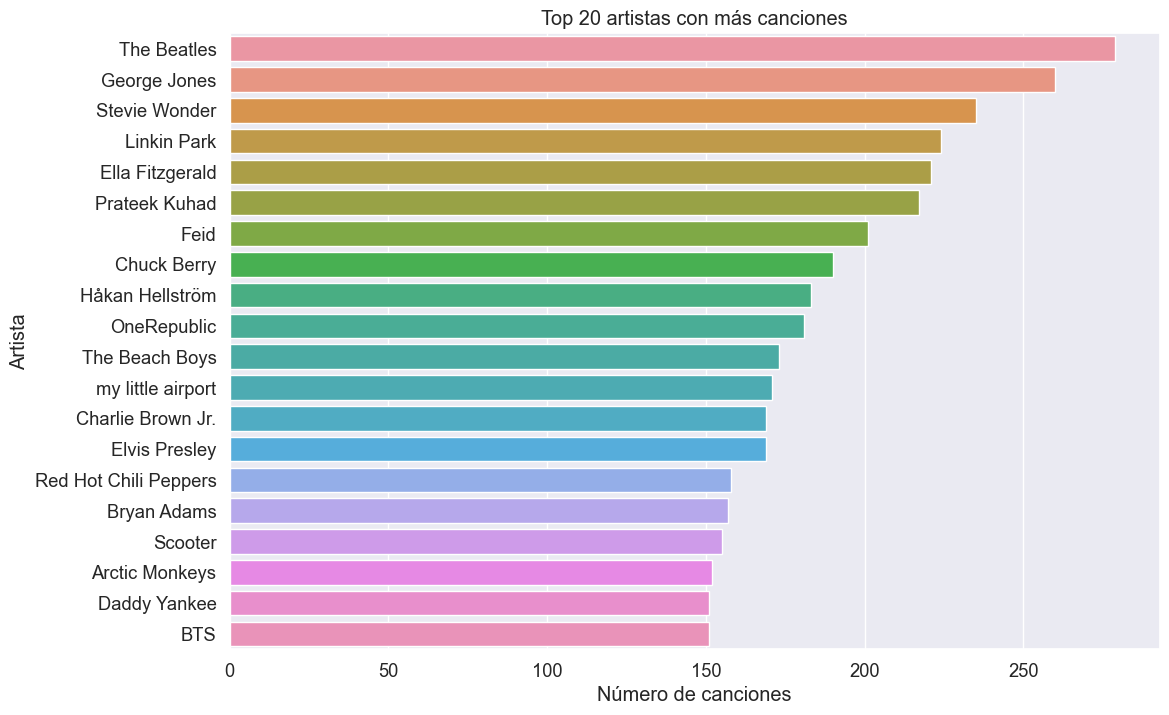

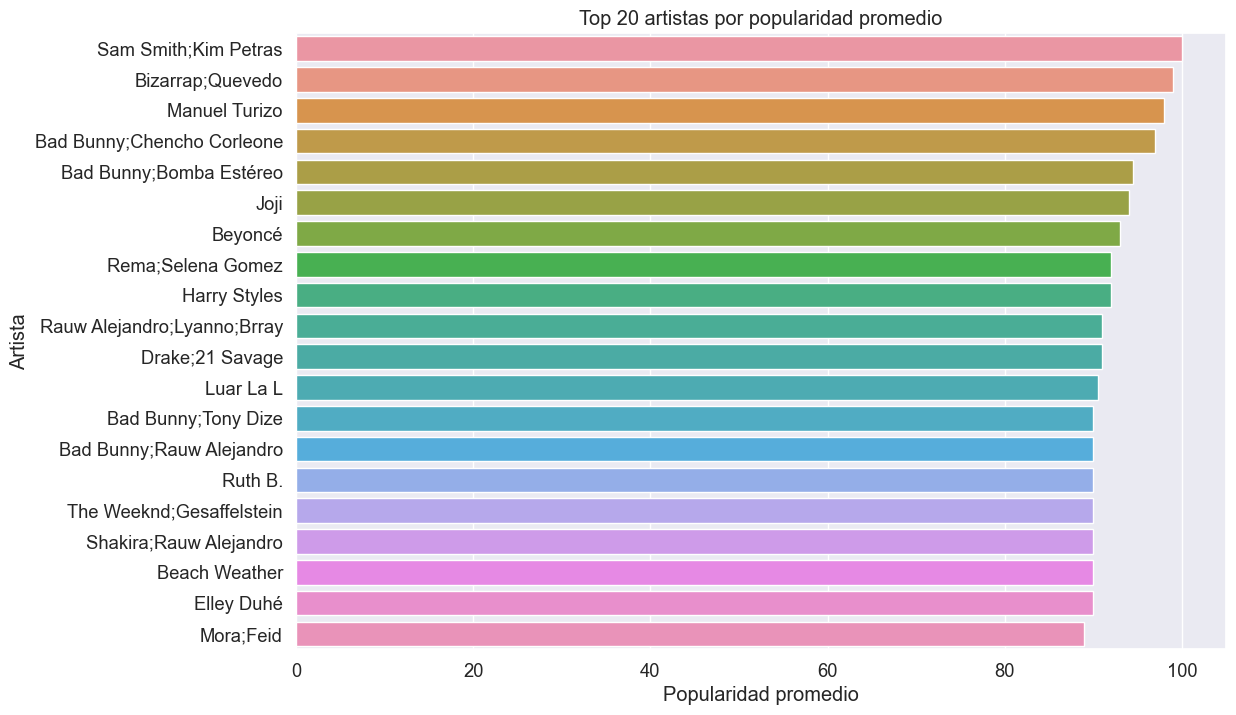

In [ ]:
# Análisis de artistas
top_artists = df['artists'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_artists.index, x=top_artists.values)
plt.title('Top 20 artistas con más canciones')
plt.xlabel('Número de canciones')
plt.ylabel('Artista')
plt.show()

# Popularidad promedio por artista
artist_popularity = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(y=artist_popularity.index, x=artist_popularity.values)
plt.title('Top 20 artistas por popularidad promedio')
plt.xlabel('Popularidad promedio')
plt.ylabel('Artista')
plt.show()

Algunas características del top de artistas con más canciones son: 

- The Beatles: lideran con aprox. 250 canciones
- George Jones 
- Stevie Wonder.

Y artistas nuevos como BTS llegan al top dando una revolución e impacto global en la música.


Y hallazgos en el top de artistas por popularidad tenemos a Bad Bunny, The Weeknd, Beyoncé, Harry Styles, por lo cual música actual tiene una mezcla de estos géneros: reggaetón, pop y electrónica.

También as colaboraciones entre artistas aumentan la posibilidad de llegar a tener mayor popularidad, como los dúos (ejemplo: Rema & Selena Gomez).

Y como características de estos artistas es que tienen más sencillos que albumen largos, por lo que las disqueras pueden aumentar su popularidad cambiando esta estrategia comercial a una disco más sencillo.

Discográficas podrían priorizar lanzamientos de sencillos en lugar de álbumes largos.

Cabe destacar que la cantidad de canciones no influye en su popularidad pues hay artistas como Bad Bunny que tiene menos canciones que The Beatles, pero tiene una mayor popularidad.

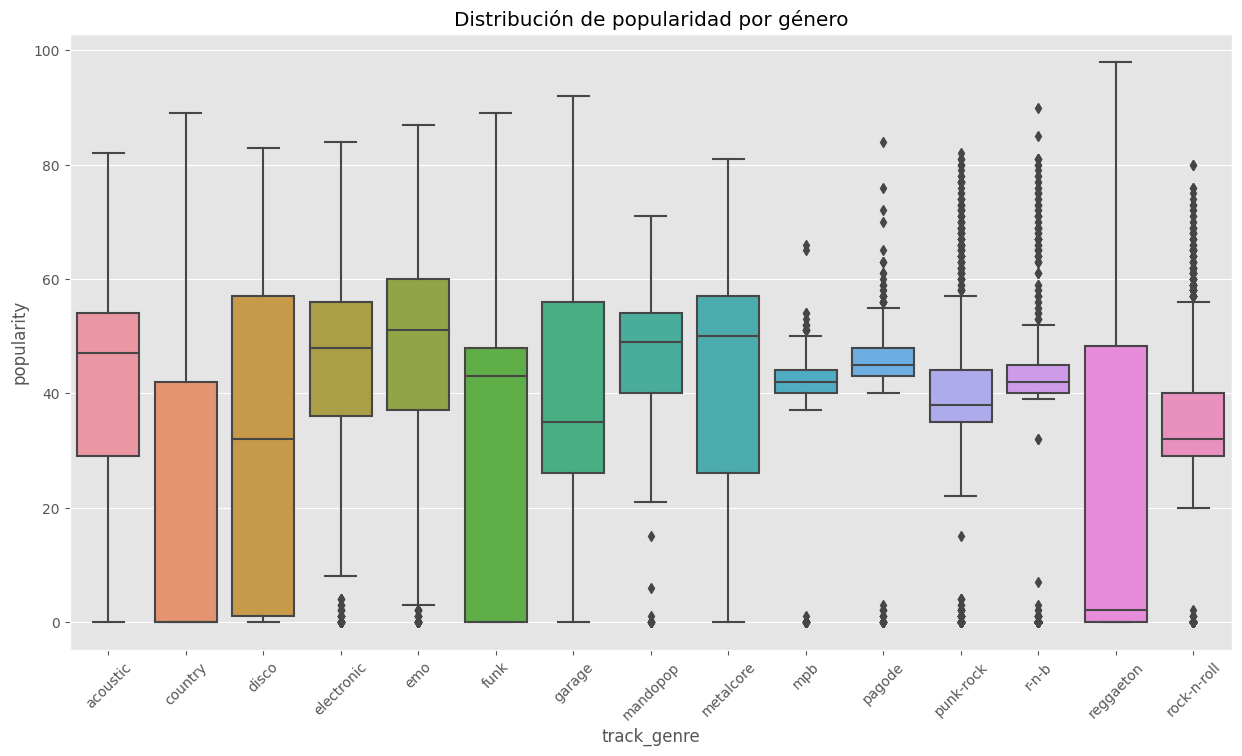

In [18]:
# Boxplot por género
plt.figure(figsize=(15, 8))
top_genres = df['track_genre'].value_counts().head(15).index
sns.boxplot(data=df[df['track_genre'].isin(top_genres)], 
            x='track_genre', y='popularity')
plt.title('Distribución de popularidad por género')
plt.xticks(rotation=45)
plt.show()

Podemos observar que géneros como acoustic, disco, emo, electronic, funk y metalcore tienen una mediana alta casi lleganodo a 50. También géneros como mandopop, metalcore, garage tienen una distribución muy amplia, lo que indica que hay canciones muy populares y otras poco populares.

Mientras que el reggaeton tieen alta variabilidad y outliers hacia arriba, por lo cual hay excepciones, es decir, canciones que alcanzan más popularidad que el promedio.

Y por géneros como mpb, pagode, punk-rock, r&b, electronic y funk tienen cajas muy estrechas, lo que sugiere tienen una popularidad constante, sin muchos cambios a lo largo de ellas.

Por lo tanto, un género único no existe, sino que hay una variabilidad alta y extensa que hacer más competencia en llegar a tener cancione que sean populares. Pero para los géneros como disco, acoustic y emo tienden una popularidad altas y constante, llegando así a tener más canciones con éxito en listas.

Luego abarcamos los contenidos explícitos de algunos albumen y sencillos de estos artistas y en qué repercuta estos con la popularidad en las listas. Además, evaluamos la bailabilidad y la energía de estas canciones y que pueden influir en alcanzar una mayor popularidad:

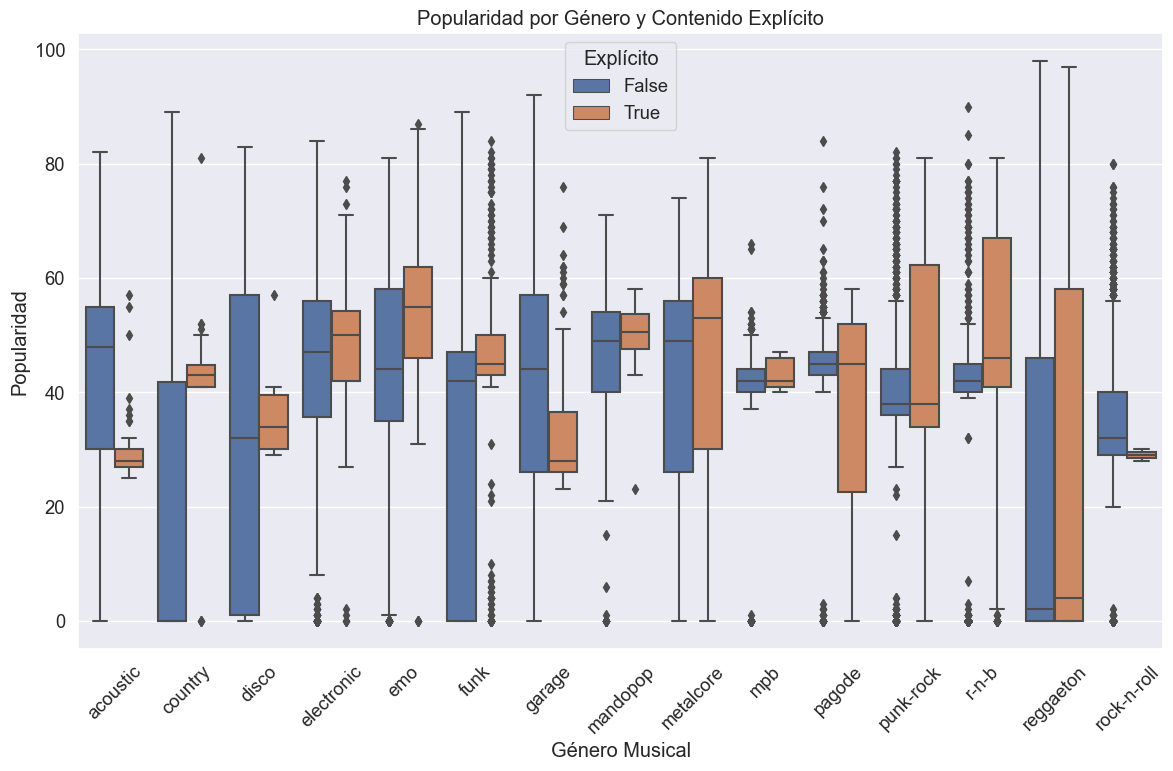

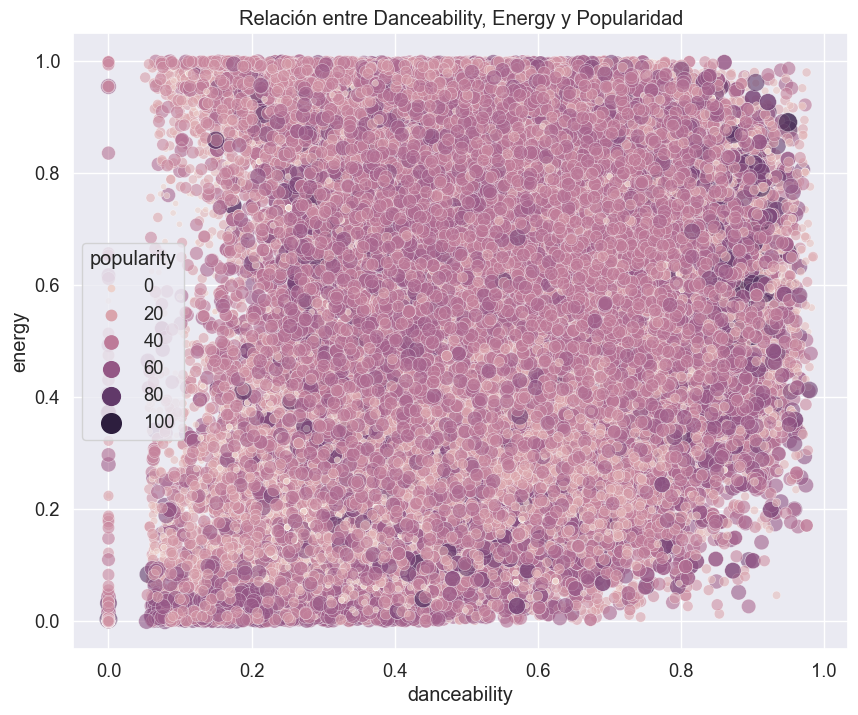

In [25]:
# Popularidad por género y explicit content
plt.figure(figsize=(14, 8))
sns.boxplot(x='track_genre', y='popularity', hue='explicit', 
            data=df[df['track_genre'].isin(top_genres)])
plt.title('Popularidad por Género y Contenido Explícito')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.legend(title='Explícito')
plt.show()

# Relación entre popularity, danceability y energy
plt.figure(figsize=(10, 8))
sns.scatterplot(x='danceability', y='energy', size='popularity', 
                hue='popularity', data=df, alpha=0.6, sizes=(20, 200))
plt.title('Relación entre Danceability, Energy y Popularidad')
plt.show()


Algunas repercuciones en el cotenido explicito de algunas canciones y su popularidad sí están relacionadas pues las canciones explícitas tienden a ser más populares, como podemos ver en géneros como emo, metalcore, reggaeton r-n-b pues tienen una mediana más alta que las no explícitas, contrario al caso de los géneros mpb y pagode, que no muestran ningún hallazgo de temas explícitos y los no explícitos.

Mientra que oara géneros como acoustic, disco, garage y rock-n-roll no on muy populares por sus temas explícitos.

Y géneros como funk, mandopop, punk-rock y country no tienen una diferencias marcada entre sus canciones explícitas y las no explícitas.

Por tanto, la presencia de contenido explícito no garantiza una mayor o menor popularidad pues se sigue viendo que la variabilidad en el género afecta mucho que resurgan este tipo de vocabulario. También hay géneros donde la diferencia es mínima o donde ambos tipos coexisten con niveles similares de éxito.

En cuanto a la relación entre la bailabilidad y energía muchas canciones tienden a ser tanto bailables como energéticas pues existe una correlación entre alta energía y bailabilidad con alta popularidad (zona superior derecha).

Por lo cual, las canciones que son tanto bailables como energéticas tienden a destacarse más entre las populares, y aún así existen canciones con baja energía o bailabilidad que también logran buena popularidad en el centro de la gráfica, por lo que no son factores exclusivos pero si influyen significativamente en que tengan una mayor popularidad.

In [26]:
# Resumen de hallazgos
print("\nResumen de hallazgos:")
print(f"- Cantidad total de géneros únicos: {df['track_genre'].nunique()}")
print(f"- Género más popular en promedio: {popularity_by_genre.idxmax()} ({popularity_by_genre.max():.2f})")
print(f"- Género menos popular en promedio: {popularity_by_genre.idxmin()} ({popularity_by_genre.min():.2f})")
print("- Variables más correlacionadas con popularidad:")
print(corr.sort_values(ascending=False).head(5))


Resumen de hallazgos:
- Cantidad total de géneros únicos: 114
- Género más popular en promedio: pop-film (59.28)
- Género menos popular en promedio: iranian (2.22)
- Variables más correlacionadas con popularidad:
loudness        0.047371
danceability    0.034412
tempo           0.012180
energy         -0.002444
liveness       -0.005658
Name: popularity, dtype: float64


Concluimos que hay mucha diversidad musical hoy en día pues hay 114 géneros bien representados.
Contiene una distribución balanceada de géneros y una distribución asimétrica de popularidad, lo que sugiere que todos los géneros tienen oportunidad pero pocos alcanzan máxima popularidad.


Este EDA representa la diversidad musical actual. Captura la dinámica competitiva de la industria ofrenciendo oportunidades para descubrir patrones ocultos en ciertos géneros, poder predecir un éxito musical y optimizar recomendaciones

Pero unas limitantes serían que no se considera temporalidad (es decir, evolución histórica). También carece de datos demográficos de oyentes. Contiene métricas de popularidad pueden tener sesgos algorítmicos, lo cual es dificil de analizar.

Y para predicciones futuras se podría tener en cuenta análisis temporal de tendencias, una segmentación por región geográfica y un modelado de factores de éxito.